# Trading Strategy Development

In [11]:
import sys
sys.path.append("..")
from src.model import *
from src.Utils_simulations import *
from src.Utils_study_results import *

In [ ]:
# ============================
# Simulation du modèle pour différents mois d'entraînement et nombre d'itérations et sauvegarde des résultats
# ============================

sentiment_cols = [
    'SENTIMENT_VADER',
    'SENTIMENT_FinancialBERT-Sentiment-Analysis',
    'SENTIMENT_distilroberta-finetuned-financial-news-sentiment-analysis',
    'SENTIMENT_deberta-v3-ft-financial-news-sentiment-analysis'
]

# 1. Initialisation du modèle avec des valeurs de base
model = SentimentTradingModel(
    weights=[0, 0, 0, 1],
    buy_threshold=0.2,
    sell_threshold=-0.2,
    rolling_days=1,
    weight_verified=0.25,
    sentiment_cols=sentiment_cols
)

date_debut = '01/01/2022'
date_fin = '01/01/2025'

nb_iterations = 200
nombre_mois_entrainement = 1
print(f"\n📈 Simulation avec {nb_iterations} itérations et {nombre_mois_entrainement} mois")

resultats_historique, model_historique = simuler_marche_journalier(
    cash=1000,
    model=model,
    date_debut=date_debut,
    date_fin=date_fin,
    sentiment_cols=sentiment_cols,
    Nb_iter=nb_iterations,
    nombre_mois_entrainement=nombre_mois_entrainement
)

stats, _ = analyser_performance_portefeuille(resultats_historique)
stats


📈 Simulation avec 200 itérations et 1 mois


⏳ Simulation en cours:   0%|          | 0/484 [00:00<?, ?it/s]

{'Rendement total (%)': 72.85217520666964,
 'Rendement annualisé (%)': 32.96828335197994,
 'Volatilité annualisée (%)': 61.10413975679394,
 'Max Drawdown (%)': -50.35974705810814,
 'Écart annuel de performance (%)': 18.287525129689676,
 'Écart moyen (vs action) / capital initial (%)': 45.91541787187797}

### Conclusion de la simulation :

In [13]:
print(f"📊 Bilan du portefeuille :\n")
print(f"• Le rendement total est de {stats['Rendement total (%)']:.2f}%.")
print(f"• Le rendement annualisé est de {stats['Rendement annualisé (%)']:.2f}% avec une volatilité annualisée de {stats['Volatilité annualisée (%)']:.2f}%.")
print(f"• Le pire repli observé (Max Drawdown) est de {stats['Max Drawdown (%)']:.2f}%.")

print(f"\n📈 Comparaison avec l'action sous-jacente :\n")
print(f"• L'écart annuel de performance par rapport à l'action est de {stats['Écart annuel de performance (%)']:.2f}%.")
print(f"• En moyenne, le portefeuille a eu {stats['Écart moyen (vs action) / capital initial (%)']:.2f}% de valeur en plus que l'action chaque jour, rapporté au capital initial.")

📊 Bilan du portefeuille :

• Le rendement total est de 72.85%.
• Le rendement annualisé est de 32.97% avec une volatilité annualisée de 61.10%.
• Le pire repli observé (Max Drawdown) est de -50.36%.

📈 Comparaison avec l'action sous-jacente :

• L'écart annuel de performance par rapport à l'action est de 18.29%.
• En moyenne, le portefeuille a eu 45.92% de valeur en plus que l'action chaque jour, rapporté au capital initial.


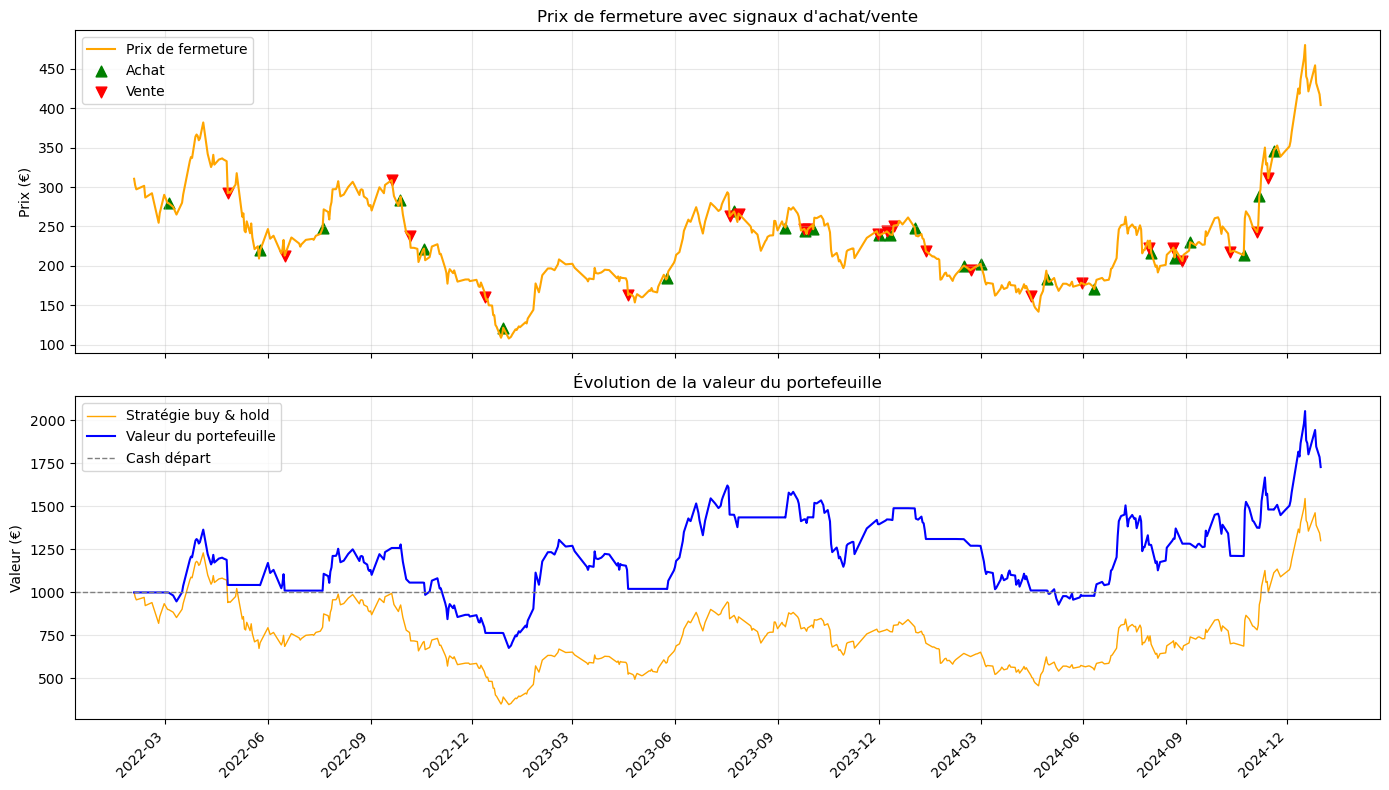

In [14]:
plot_historique(pd.DataFrame(resultats_historique))

### 📊 Conclusion de la stratégie de trading

La stratégie testée sur la période **2022–2024** a produit des résultats globalement convaincants :

- Elle a **surperformé l’action Tesla**, avec un gain cumulé atteignant **+72,85 %**, soit un écart de performance annuelle de **+18,29 %** par rapport à l’actif sous-jacent.
- Lors des phases de forte baisse du titre (notamment début et fin 2022), le modèle est resté **largement hors marché**, limitant efficacement l’exposition au risque. Le portefeuille est ainsi resté stable, voire en progression, démontrant une bonne capacité à **éviter les mouvements défavorables**.
- Les signaux générés ont été **globalement alignés avec les retournements de tendance**, bien que quelques faux signaux soient inévitables dans une stratégie automatique.

En résumé, cette approche montre un bon compromis entre **rentabilité**, **maîtrise du risque** et **cohérence des signaux**, en faisant une base prometteuse pour une stratégie de trading algorithmique à long terme.


## Affichons les paramètres de la simulation :

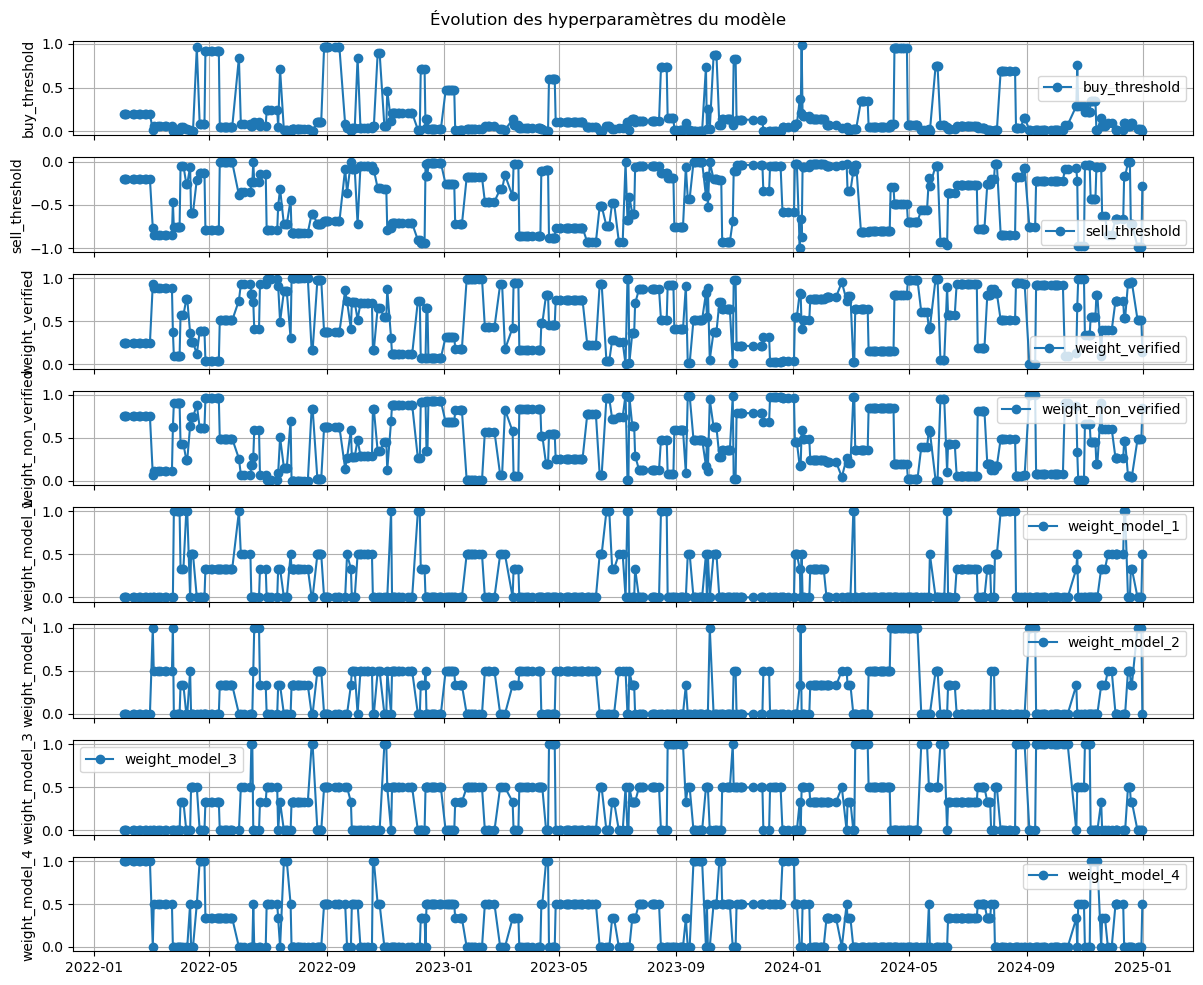

In [16]:
plot_hyperparams_over_time(model_historique,resultats_historique['date'])

    On observe que les paramètres optimaux ne suivent pas de schéma clair ou régulier.
    Il serait donc pertinent d’analyser plus en détail comment ces paramètres (ainsi que les performances associées) évoluent en fonction du nombre d’itérations et de la durée d’entraînement (en mois).